In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scipy

In [3]:
insu = pd.read_csv('customers.csv')

In [4]:
# making two deep copies of insu

insu2 = insu.copy(deep=True)
insu3 = insu.copy(deep=True)


In [5]:
print(insu.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
print(insu.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# rows and columns
print(insu.shape)

(200, 5)


In [8]:
# each column's data type

print(insu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### Observations from info()

1) All columns except the Gender column are int64.

2) Dtype of the Gender column is object, which means string. 

3) No null values.

In [9]:
# describe() can only work on columns that are of dtype int or float
print(insu.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


#### Observations from describe() are

1) Age's mean and median are pretty close, one if 38.85 and the other is 36.

2) Annual income's mean and median are 60.56 and 61.5, they are close to each other.

3) Spending Score's mean and median are very close. 

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

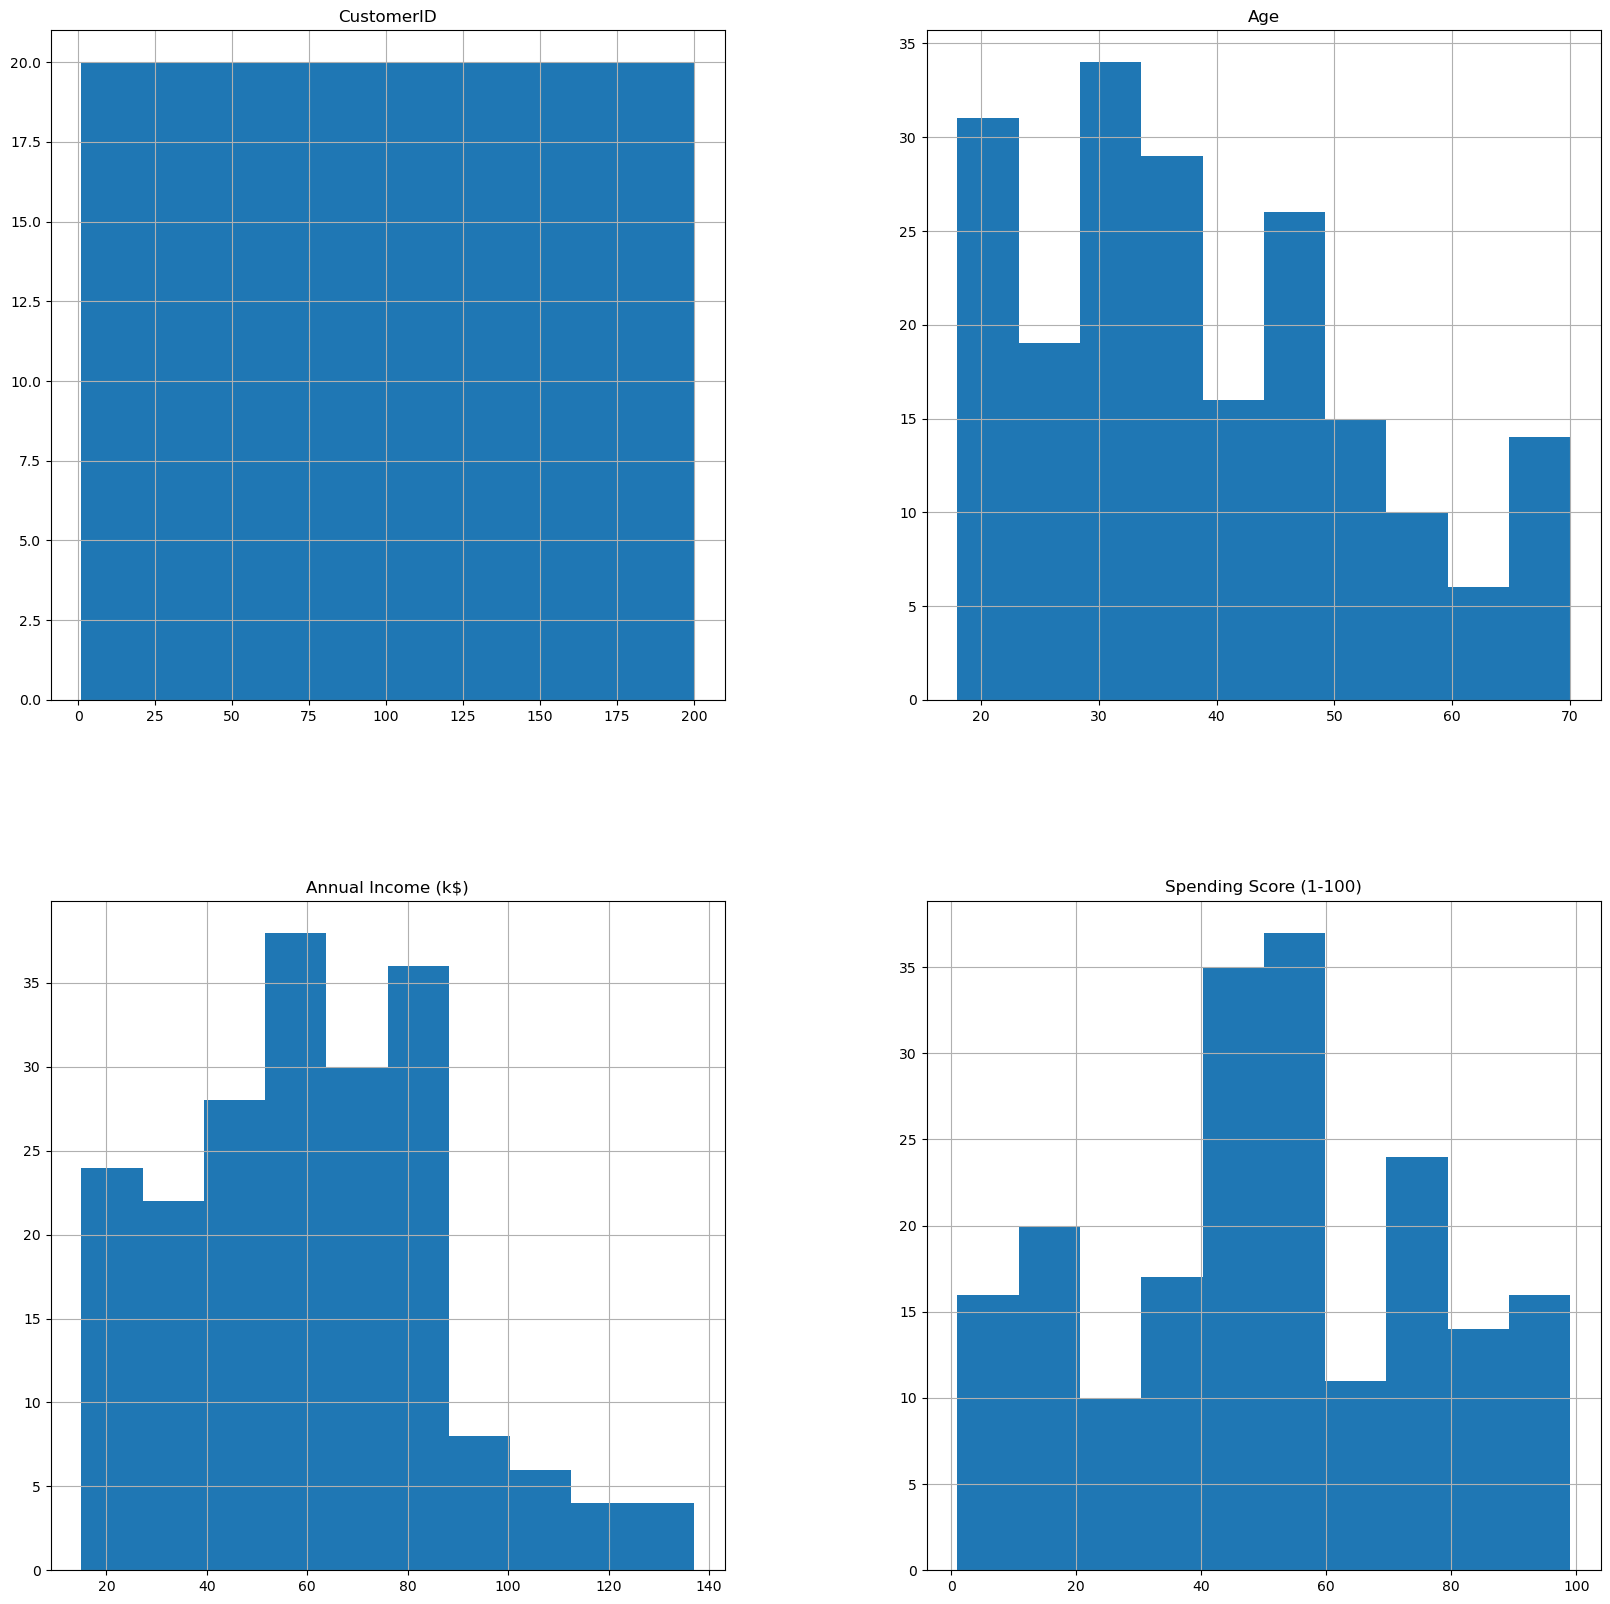

In [10]:
insu.hist(figsize=(20,20))

#### Observations after plotting histogram:

1. From looking at the age histogram, most people seems to be 40 years of age or lower.

2. From looking at the Annual Income Histogram, most people make $60,000 or less

3. From looking at the spending score histogram we see it is split fairly evenly with half the people having a score below 50 and the other half with a spending score above 50. 

4. The spending scores are normally distributed. 

In [11]:
from sklearn import preprocessing

In [12]:
# let's take a look at the data's head again
print(insu.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
# confirming no null values by using isnull().sum()
print(insu.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Converting Gender, the categorical feature to numeric 

Before we feed our data to the ML model, we have to convert even categorical features into numeric. In this dataset, Gender is the only categorical feature. 

We will use the map() method to map male and female to 0 and 1 respectively.

We will be using a custom dictionary, {"Male":0, "Female":1} for conversion.

In [14]:
insu["Gender"] = insu["Gender"].map({"Male":0, "Female":1})

In [15]:
print(insu["Gender"].unique())

[0 1]


In [16]:
# after covnerting Gender to numeric
insu.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [17]:
# Since CustomerID is just a number and has no bearing on the model, we drop it.
insu = insu.drop("CustomerID", axis=1)

In [18]:
print(insu.describe())

           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


#### Which K to pick?

Here, we are considering Elbow method to select the right K.

Since we don't know the right K that would work for this dataset, we will consider different K values starting from 2 and 
find te intertia_ for each K and plot K vs intertia_. 

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

(200, 5)


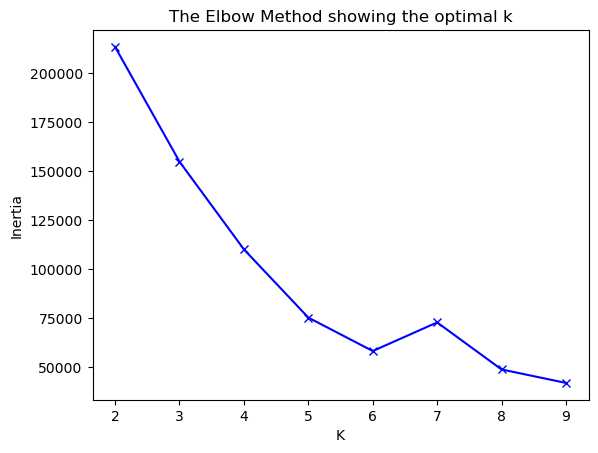

In [42]:
"""
We are creating a list that will hold the 
intertia_ = Sum of squared distances of samples to their closest cluster center.

We are then plotting interia_ for different k values.
"""

print(insu.shape)
# k means determine k
inertia_list = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init="auto").fit(insu)
    inertia_list.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, inertia_list, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Conclusion from the Elbow Method


The rate of change between K=4 and K=5 is higher and it slows down between K=5 and K=6, so we can conclude that k=5 works better. 

#### Building a model with K=5

The Elbow Method only helps us find the right K, but then we have to use that K and we have to build a model with this K.

In [43]:
# Rerun the model with k=5

x = insu

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0).fit(x)

In [22]:
print(x.shape)

(200, 4)


In [23]:
# we are using the km model and grouping the data points

y_km = km.predict(x)

# Gender, Age, Annual Income, Spending Score

print("Gender, Age, Annual Income, Spending Score")
print(km.cluster_centers_)

Gender, Age, Annual Income, Spending Score
[[ 0.60869565 25.52173913 26.30434783 78.56521739]
 [ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.47222222 40.66666667 87.75       17.58333333]]


In [24]:
print(y_km.shape)
print(y_km)

(200,)
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [25]:
print(type(y_km))

<class 'numpy.ndarray'>


In [26]:
# reshaping ykm

ykm = y_km.reshape(-1,1)

In [27]:
print(ykm.shape)
print(ykm[0:10])

(200, 1)
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [28]:
# Adding a new column with the group number

insu["Group"] = ykm

In [29]:
print("label")

label


In [30]:
print(insu.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0       0   19                  15                      39      1
1       0   21                  15                      81      0
2       1   20                  16                       6      1
3       1   23                  16                      77      0
4       1   31                  17                      40      1


In [31]:
centroids = km.cluster_centers_ 
print(centroids)

labels = km.labels_
print(labels)

[[ 0.60869565 25.52173913 26.30434783 78.56521739]
 [ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.47222222 40.66666667 87.75       17.58333333]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


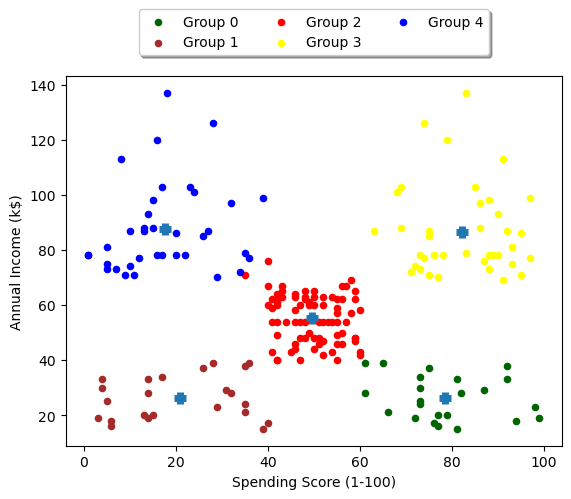

In [32]:
## notice - for since Annual Income is in column number 2 and Spending Score is in column number 3, 
## to plot the centroids, we use [:,3] and [:,2]

group0 = x[x['Group']==0].plot(kind='scatter', x='Spending Score (1-100)', y='Annual Income (k$)', color='DarkGreen', label="Group 0")
group1 = x[x['Group']==1].plot(kind='scatter', x='Spending Score (1-100)', y='Annual Income (k$)', color='Brown', ax=group0, label="Group 1")
group2 = x[x['Group']==2].plot(kind='scatter', x='Spending Score (1-100)', y='Annual Income (k$)', color='Red', ax=group0, label="Group 2")
group3 = x[x['Group']==3].plot(kind='scatter', x='Spending Score (1-100)', y='Annual Income (k$)', color='Yellow', ax=group0, label="Group 3")
group4 = x[x['Group']==4].plot(kind='scatter', x='Spending Score (1-100)', y='Annual Income (k$)', color='Blue', ax=group0, label="Group 4")

group0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:,3], centroids[:,2], marker="+", s=80, linewidths=5)
plt.show()

#### Trying out a new point and finding the group it belongs to

In [33]:
# Gender = 0, Age = 19, Annual Income 16, spending score is 30
# want to know to which group does this point belong to

x = np.array([[0, 19, 16, 30]])

y_km = km.predict(x)
print(y_km)

[1]


C:\Users\localuser\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#### Conclusion after doing a predict on the new data point

A person with Gender = 0, Age = 19, Annual Income 16, spending score is 30 belongs to group 3. 


In-class activity: Can you write a summary with steps that we considered in building our K-Means model with K=5?

#### Summary:


1. Clean the data by checking for null values. In this dataset we don't have any null values.

2. We converted the categorical data to numerical. 

3. We did univariant analysis by plotting the histograms of the numerical features.

4. To find the best K for this dataset, we build K-means model  for each K and 
computed the inertia for each K and we plotted the Elbow plot with K vs intertia.

5. After finding the best K, we have to build the final K-Means model.

6. We use the model to predict to assign data points to clusters.

7. We can append the cluster numbers to the dataset so that it's easy to identify the point to cluster relationship.



In [34]:
"""
Homework - Find another dataset for K-means application. 
"""

'\nHomework - Find another dataset for K-means application. \n'